Critical Path: A->C->E->F->G


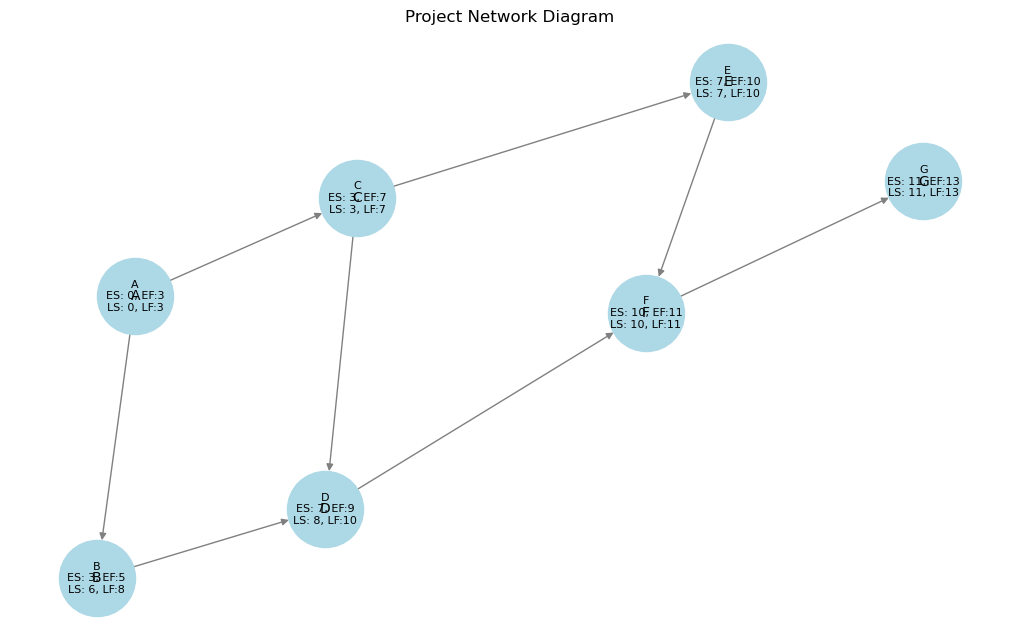

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

class Task:
    def __init__(self, name, duration):
        self.name = name
        self.duration = duration
        self.early_start = 0
        self.early_finish = 0
        self.late_start = float('inf')
        self.late_finish = float('inf')
        self.successors = []

class CPM:
    def __init__(self, tasks, dependencies):
        self.tasks = {name: Task(name, duration) for name, duration in tasks.items()}
        self.dependencies = dependencies
        self.build_graph()

    def build_graph(self):
        for task, deps in self.dependencies.items():
            for dep in deps:
                self.tasks[dep].successors.append(self.tasks[task])

    def forward_pass(self):
        for task in self.tasks.values():
            if not self.dependencies[task.name]:
                task.early_start = 0
                task.early_finish = task.duration

        for task in sorted(self.tasks.values(), key=lambda t: t.early_start):
            for succ in task.successors:
                succ.early_start = max(succ.early_start, task.early_finish)
                succ.early_finish = succ.early_start + succ.duration

    def backward_pass(self):
        max_finish = max(task.early_finish for task in self.tasks.values())
        for task in self.tasks.values():
            if not task.successors:
                task.late_finish = max_finish
                task.late_start = task.late_finish - task.duration

        for task in sorted(self.tasks.values(), key=lambda t: -t.early_finish):
            for succ in task.successors:
                task.late_finish = min(task.late_finish, succ.late_start)
                task.late_start = task.late_finish - task.duration

    def find_critical_path(self):
        return [task.name for task in self.tasks.values() if task.early_start == task.late_start]

    def run(self):
        self.forward_pass()
        self.backward_pass()
        return self.find_critical_path()

    def visualize_network(self):
        G = nx.DiGraph()
        for task in self.tasks.values():
            G.add_node(task.name, label=f"{task.name}\nES: {task.early_start}, EF:{task.early_finish}\nLS: {task.late_start}, LF:{task.late_finish}")
            for succ in task.successors:
                G.add_edge(task.name, succ.name)

        pos = nx.spring_layout(G)
        labels = {node: data['label'] for node, data in G.nodes(data=True)}
        plt.figure(figsize=(10, 6))
        nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10)
        nx.draw_networkx_labels(G, pos, labels, font_size=8)
        plt.title("Project Network Diagram")
        plt.show()

if __name__ == "__main__":
    tasks = {'A': 3, 'B': 2, 'C': 4, 'D': 2, 'E': 3, 'F': 1, 'G': 2}
    dependencies = {'A': [], 'B': ['A'], 'C': ['A'], 'D': ['B', 'C'], 'E': ['C'], 'F': ['D', 'E'], 'G': ['F']}
    cpm = CPM(tasks, dependencies)
    critical_path = cpm.run()
    print("Critical Path:", "->".join(critical_path))
    cpm.visualize_network()
